# Precipitation and vertical velocity

First let's import necessary modules: <br>
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. For more information on cartopy can be found here: <br>
  >  https://scitools.org.uk/cartopy/docs/latest/

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

## Plotting precipitation
Open and read a netCDF file.

In [3]:
filename='trmm_mon_1998_2015_new.nc'
with xr.open_dataset(filename) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:    (time: 12, longitude: 1440, latitude: 400)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-12-15
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * latitude   (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
Data variables:
    pcp        (time, latitude, longitude) float32 ...
    err        (time, latitude, longitude) float32 ...
    weight     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.4
    calendar:                  standard
    comments:                  file created by grads using lats4d available f...
    model:                     geos/das
    center:                    gsfc
    history:                   Mon Jun  6 13:47:33 2016: ncrcat /Users/jungeu...
    nco_openmp_thread_number:  1


"pcp" is a variable for precipitation. You can see that the unit is mm/hour. I'm going to change the unit to mm/day.

In [4]:
# Assign ds1.pcp to prcp
prcp=ds1.pcp*24.

Check the variable latitude and assign it as a "lat" variable.

In [5]:
lat=ds1.latitude
lat

<xarray.DataArray 'latitude' (latitude: 400)>
array([-49.875, -49.625, -49.375, ...,  49.375,  49.625,  49.875])
Coordinates:
  * latitude  (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
Attributes:
    units:      degrees_north
    long_name:  Latitude

Print variables in the file.

#### Exercise
Check the variable longitude and assign it as a "lon" variable.

### Plotting January precipitation

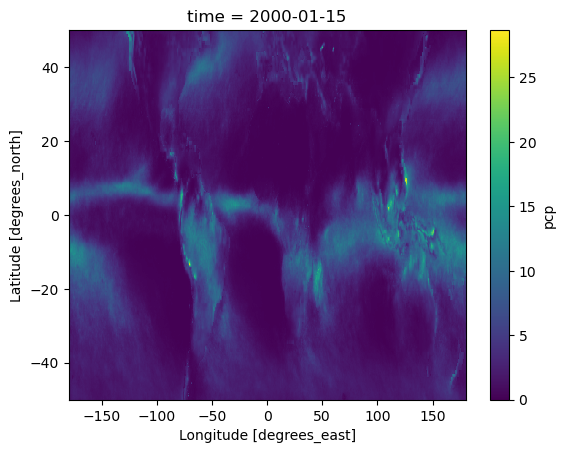

In [7]:
prcp.isel(time=0).plot()  # isel is used to specify the index.

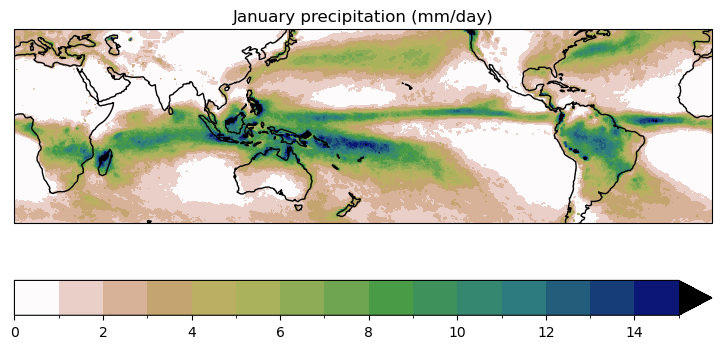

In [8]:
# Make a prettier plot
lev1=np.arange(0,16,1)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.gist_earth_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(prcp.isel(time=0)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('January precipitation (mm/day)')
fig1.colorbar(cs, orientation='horizontal') # color map

#### Exercise
Plot July precipitation.

## Plotting vertical velocity

#### Data catalog from NOAA
https://psl.noaa.gov/thredds/catalog/catalog.html

We will use ncep realanysis2 long term mean data. Please find the data on the web and click the "*.nc" file. You can find the information on the next page. Choose OpenDAP and copy the data link.

In [12]:
file_loc="https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2.derived/LTMs/pressure/"
filename2="omega.mon.ltm.nc"

with xr.open_dataset(file_loc+filename2) as ds2:      
    print(ds2)

<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    omega               (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:         

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [23]:
# Let's check Omega
ds2.omega

<xarray.DataArray 'omega' (time: 12, level: 17, lat: 73, lon: 144)>
[2144448 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes: (12/15)
    long_name:      Long Term Mean Monthly Omega on Pressure Levels
    units:          Pascal/s
    precision:      3
    GRIB_id:        39
    GRIB_name:      VVEL
    var_desc:       Omega (dp/dt)
    ...             ...
    parent_stat:    Individual Obs
    standard_name:  omega
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [-4.  8.]
    actual_range:   [-0.2481877  0.4020645]
    _ChunkSizes:    [  1   1  73 144]

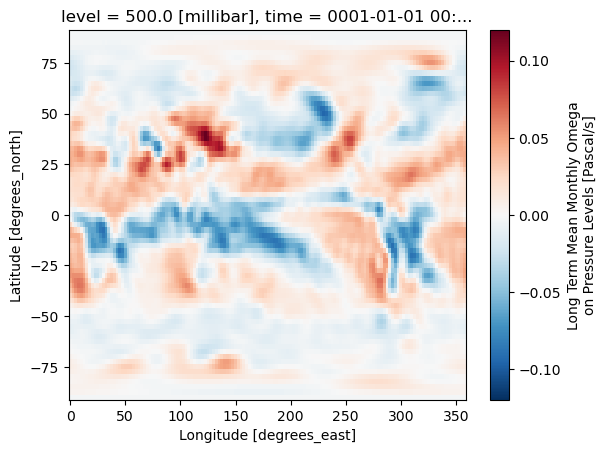

In [15]:
# select January and 500 hPa and plot.
ds2.omega.isel(time=0).sel(level=500).plot()  # sel is used to specify values.

Text(0.5, 1.0, 'January Omega (Pa/s)')

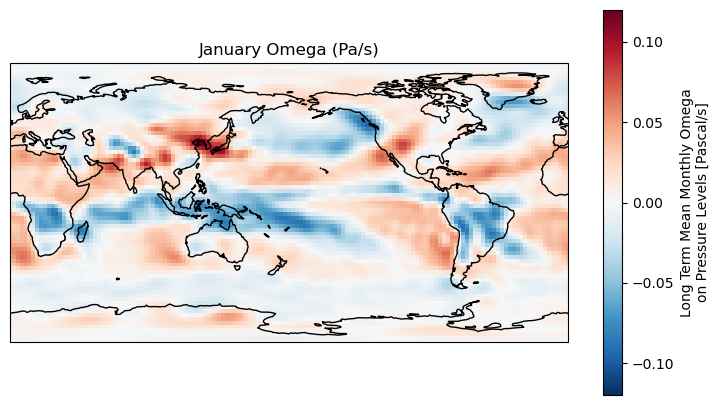

In [24]:
# Make a prettier plot.
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs2=ds2.omega.isel(time=0).sel(level=500).plot.pcolormesh(ax=ax2, transform=ccrs.PlateCarree())
ax2.coastlines()
plt.title('January Omega at 500 hPa (Pa/s)')

#### Exercise
Plot July Omega.

#### Homework
Explain major patterns of precipitation and vertical velocity in January and July.